In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('D:/New folder/Polynomial_Regression/Position_Salaries.csv')

In [3]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X=data[['Level']]
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [5]:
y=data['Salary']
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [6]:
import statsmodels.api as sm

In [7]:
x=sm.add_constant(X)

C:\Users\Raj\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [8]:
model=sm.OLS(y,x)
model=model.fit()
model.summary()

C:\Users\Raj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     16.17
Date:                Thu, 16 Apr 2020   Prob (F-statistic):            0.00383
Time:                        10:48:36   Log-Likelihood:                -134.23
No. Observations:                  10   AIC:                             272.5
Df Residuals:                       8   BIC:                             273.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.953e+05   1.25e+05     -1.565      0.156   -4.83e+05    9.24e+04
Level       8.088e+04   2.01e+04      4.021      0.004    3.45e+04    1.27e+05
==============================================================================
Omnibus:                        5.661   Durbin-Watson:                   0.786
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                2.297
Skew:                           1.148   Prob(JB):                        0.317
Kurtosis:                       3.492   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
import matplotlib.pyplot as plt
import seaborn as sn

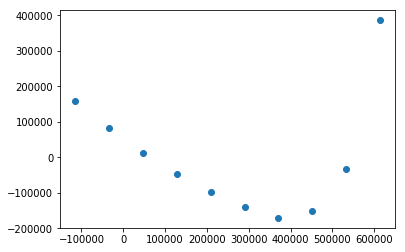

In [10]:
plt.scatter(x=model.predict(), y=model.resid)

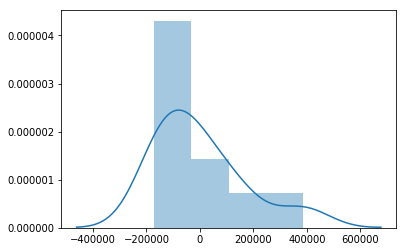

In [11]:
sn.distplot(model.resid)

In [12]:
from scipy import stats

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([-170818.18181818, -151696.96969697, -139939.39393939,
          -99060.60606061,  -48181.81818182,  -32575.75757576,
           12696.96969697,   83575.75757576,  159454.54545455,
          386545.45454545])),
 (175553.48825164436, -5.6284965316325416e-11, 0.9351429326950845))

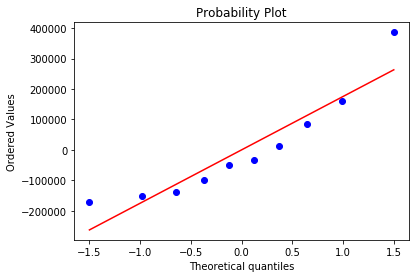

In [13]:
stats.probplot(model.resid, plot=sn.mpl.pyplot)

In [14]:
resids_standardized = model.get_influence().resid_studentized_internal

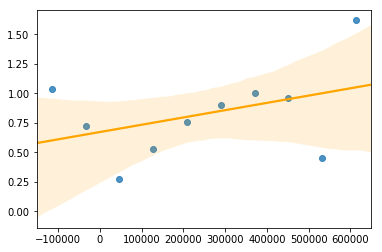

In [15]:
sn.regplot(x=model.predict(), y=np.sqrt(np.abs(resids_standardized)),line_kws={'color':'orange'})

In [16]:
y_pred=model.predict()

In [17]:
X['Level2']=X['Level']**2

C:\Users\Raj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
X

,Level,Level2
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25
5,6,36
6,7,49
7,8,64
8,9,81
9,10,100


In [19]:
x1=sm.add_constant(X)

C:\Users\Raj\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [20]:
model1=sm.OLS(y,x1).fit()
model1.summary()

C:\Users\Raj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     38.27
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           0.000170
Time:                        10:48:42   Log-Likelihood:                -127.36
No. Observations:                  10   AIC:                             260.7
Df Residuals:                       7   BIC:                             261.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.322e+05   1.16e+05      2.009      0.085   -4.11e+04    5.05e+05
Level      -1.329e+05   4.83e+04     -2.753      0.028   -2.47e+05   -1.87e+04
Level2      1.943e+04   4276.317      4.544      0.003    9319.935    2.95e+04
==============================================================================
Omnibus:                        0.268   Durbin-Watson:                   1.307
Prob(Omnibus):                  0.874   Jarque-Bera (JB):                0.413
Skew:                           0.164   Prob(JB):                        0.813
Kurtosis:                       2.059   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

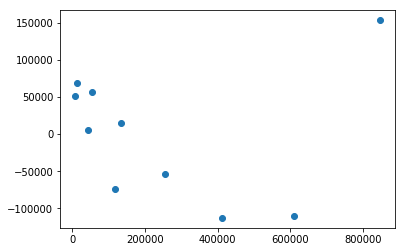

In [21]:
plt.scatter(x=model1.predict(), y=model1.resid)

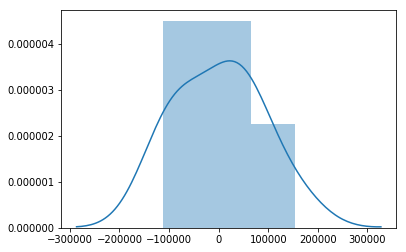

In [22]:
sn.distplot(model1.resid)

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([-112833.33333333, -110303.03030303,  -73727.27272727,
          -54227.27272727,    5848.48484848,   15515.15151515,
           51560.6060606 ,   56393.93939394,   68409.09090909,
          153363.63636364])),
 (92358.30891225369, -1.2418739438782524e-09, 0.9777565800136027))

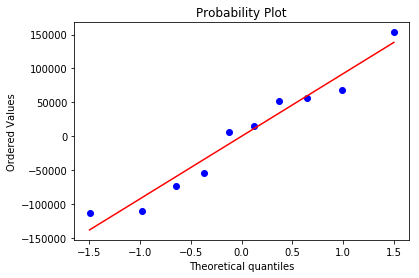

In [23]:
stats.probplot(model1.resid, plot=sn.mpl.pyplot)

In [24]:
resids_standardized1 = model1.get_influence().resid_studentized_internal

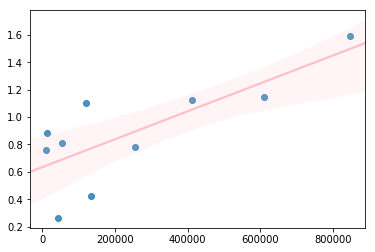

In [25]:
sn.regplot(x=model1.predict(), y=np.sqrt(np.abs(resids_standardized1)),line_kws={'color':'pink'})

In [26]:
X['Level3']=X['Level']**3
x2=sm.add_constant(X)
x2

,const,Level,Level2,Level3
0,1.0,1,1,1
1,1.0,2,4,8
2,1.0,3,9,27
3,1.0,4,16,64
4,1.0,5,25,125
5,1.0,6,36,216
6,1.0,7,49,343
7,1.0,8,64,512
8,1.0,9,81,729
9,1.0,10,100,1000


In [27]:
model2=sm.OLS(y,x2).fit()
model2.summary()

C:\Users\Raj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     104.4
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           1.44e-05
Time:                        10:48:45   Log-Likelihood:                -119.88
No. Observations:                  10   AIC:                             247.8
Df Residuals:                       6   BIC:                             249.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.213e+05   9.75e+04     -1.244      0.260    -3.6e+05    1.17e+05
Level       1.807e+05   7.31e+04      2.471      0.048    1759.690     3.6e+05
Level2     -4.855e+04   1.51e+04     -3.219      0.018   -8.55e+04   -1.16e+04
Level3      4120.0466    904.338      4.556      0.004    1907.212    6332.881
==============================================================================
Omnibus:                        0.742   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.690   Jarque-Bera (JB):                0.664
Skew:                          -0.420   Prob(JB):                        0.718
Kurtosis:                       2.057   Cond. No.                     3.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

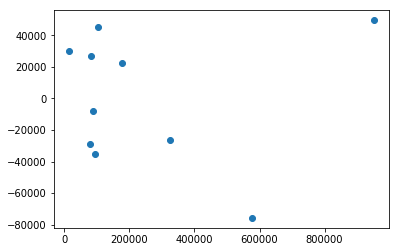

In [28]:
plt.scatter(x=model2.predict(), y=model2.resid)

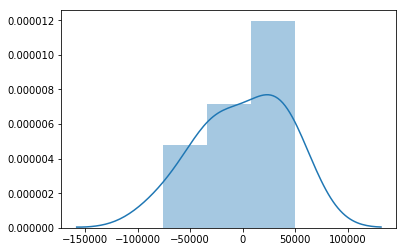

In [29]:
sn.distplot(model2.resid)

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([-75694.63869463, -34960.37296036, -28759.9067599 , -26312.35431234,
          -8223.77622377,  22405.59440561,  26729.60372961,  30097.90209791,
          45179.4871795 ,  49538.46153848])),
 (43314.78645417003, 1.1332069798387541e-08, 0.968335022062477))

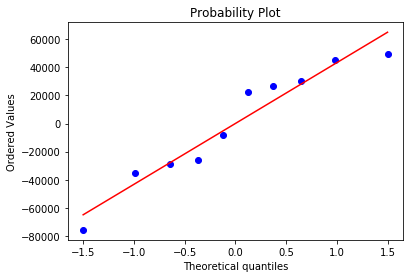

In [30]:
stats.probplot(model2.resid, plot=sn.mpl.pyplot)

In [31]:
resids_standardized2 = model2.get_influence().resid_studentized_internal

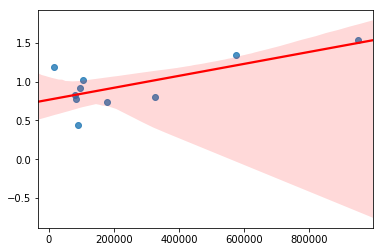

In [32]:
sn.regplot(x=model2.predict(), y=np.sqrt(np.abs(resids_standardized2)),line_kws={'color':'red'})

In [33]:
X['Level4']=X['Level']**4

In [34]:
x3=sm.add_constant(X)

In [35]:
model3=sm.OLS(y,x3).fit()
model3.summary()

C:\Users\Raj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     478.1
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           1.21e-06
Time:                        10:48:48   Log-Likelihood:                -110.01
No. Observations:                  10   AIC:                             230.0
Df Residuals:                       5   BIC:                             231.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.842e+05   6.78e+04      2.718      0.042    9963.382    3.58e+05
Level       -2.11e+05   7.64e+04     -2.762      0.040   -4.07e+05   -1.47e+04
Level2      9.477e+04   2.65e+04      3.582      0.016    2.68e+04    1.63e+05
Level3     -1.546e+04   3534.989     -4.374      0.007   -2.46e+04   -6376.309
Level4       890.1515    159.803      5.570      0.003     479.364    1300.939
==============================================================================
Omnibus:                        0.950   Durbin-Watson:                   2.281
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.767
Skew:                          -0.529   Prob(JB):                        0.681
Kurtosis:                       2.149   Cond. No.                     6.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

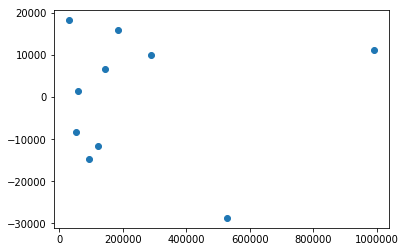

In [36]:
plt.scatter(x=model3.predict(), y=model3.resid)

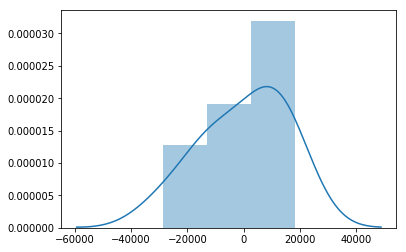

In [37]:
sn.distplot(model3.resid)

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([-28694.63869487, -14632.86713276, -11724.94172486,  -8356.64335653,
           1357.80885793,   6724.94172497,  10005.82750571,  11083.91608355,
          15996.50349647,  18240.09324022])),
 (16202.768148172323, -1.7811176417484824e-08, 0.9723328976994565))

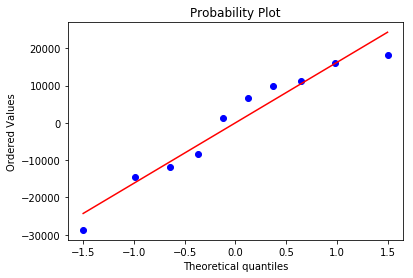

In [38]:
stats.probplot(model3.resid,plot=plt.matplotlib.pyplot)

In [39]:
resids_standardized3= model3.get_influence().resid_studentized_internal

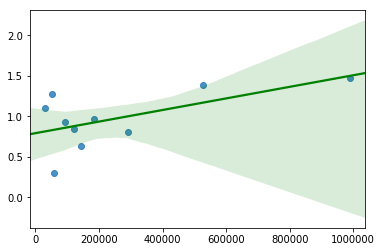

In [40]:
sn.regplot(x=model3.predict(), y=np.sqrt(np.abs(resids_standardized3)),line_kws={'color':'green'})

In [41]:
X['Level5']=X['Level']**5

In [42]:
x4=sm.add_constant(X)

In [43]:
model4=sm.OLS(y,x4).fit()
model4.summary()

C:\Users\Raj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     3938.
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           1.80e-07
Time:                        10:48:52   Log-Likelihood:                -97.248
No. Observations:                  10   AIC:                             206.5
Df Residuals:                       4   BIC:                             208.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.133e+04    3.9e+04     -1.060      0.349    -1.5e+05    6.69e+04
Level       1.607e+05    5.9e+04      2.722      0.053   -3192.864    3.25e+05
Level2     -1.004e+05   2.95e+04     -3.399      0.027   -1.82e+05   -1.84e+04
Level3      2.816e+04   6434.904      4.377      0.012    1.03e+04     4.6e+04
Level4     -3446.3869    632.118     -5.452      0.005   -5201.427   -1691.347
Level5       157.6923     22.914      6.882      0.002      94.072     221.313
==============================================================================
Omnibus:                        0.875   Durbin-Watson:                   2.974
Prob(Omnibus):                  0.646   Jarque-Bera (JB):                0.298
Skew:                           0.405   Prob(JB):                        0.861
Kurtosis:                       2.759   Cond. No.                     1.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
a=pd.DataFrame({'Level':[6.5],'Level2':[6.5**2]})
a

,Level,Level2
0,6.5,42.25


In [58]:
model1.predict(a)

ValueError: shapes (1,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)